### Importing Libraries

In [3]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import numpy as np

### Neural Network Architechture

In [4]:
model= Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    



### Image Data Generation and Augmentation

In [5]:
import zipfile as zf
files = zf.ZipFile("train.zip", 'r')
files.extractall('directory')
files.close()


In [6]:
import zipfile as zf
files = zf.ZipFile("test.zip", 'r')
files.extractall('directory1')
files.close()

In [7]:
TRAINING_DIR = "./directory/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./directory1/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [8]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

### Training the model

In [9]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

C:\Users\Itisha\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
132/132 [==============================] - 114s 795ms/step - loss: 0.7753 - acc: 0.6091 - val_loss: 0.4371 - val_acc: 0.8144
INFO:tensorflow:Assets written to: model2-001.model\assets
Epoch 2/10
132/132 [==============================] - 94s 709ms/step - loss: 0.4399 - acc: 0.8122 - val_loss: 0.1714 - val_acc: 0.9381
INFO:tensorflow:Assets written to: model2-002.model\assets
Epoch 3/10
132/132 [==============================] - 104s 789ms/step - loss: 0.2993 - acc: 0.8840 - val_loss: 0.1254 - val_acc: 0.9433
INFO:tensorflow:Assets written to: model2-003.model\assets
Epoch 4/10
132/132 [==============================] - 97s 734ms/step - loss: 0.2939 - acc: 0.8942 - val_loss: 0.0830 - val_acc: 0.9794
INFO:tensorflow:Assets written to: model2-004.model\assets
Epoch 5/10
132/132 [==============================] - 91s 689ms/step - loss: 0.2485 - acc: 0.9055 - val_loss: 0.0952 - val_acc: 0.9588
Epoch 6/10
132/132 [==============================] - 93s 705ms/step - loss: 0.2479 - a

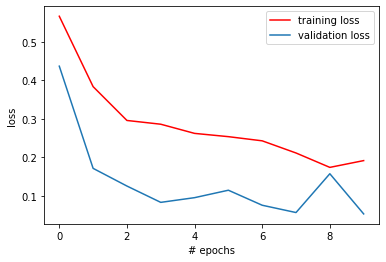

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
model = load_model('Model.model')
detector = cv2.CascadeClassifier("C:\\Users\\Itisha\\anaconda3\\envs\\tf\\Lib\\site-packages\\cv2\\data\haarcascade_frontalface_alt2.xml")
types = { 0 : 'With Mask' , 1 : 'Without Mask'}
colours = { 0 : (0,255,0) , 1 : (0,0,255)}


In [12]:
cam = cv2.VideoCapture(0)
test = tuple()
while True:
    status , img = cam.read()
    if status:
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = detector.detectMultiScale(img_gray)
        if faces != test:
            for face in faces:
                x,y,w,h = face
                face_img = img_gray[y:y+w,x:x+w]
                face_img = cv2.resize(face_img,(100,100))
                face_img = face_img/250
                face_img = np.reshape(face_img,(1,100,100,1))
                val = np.argmax(model.predict(face_img),axis=1)[0]
                cv2.rectangle(img,(x,y),(x+w,y+h),colours[val],3)
                cv2.rectangle(img,(x,y-40),(x+200,y),colours[val],-1)
                cv2.putText(img,types[val],(x,y-15),cv2.FONT_HERSHEY_SIMPLEX,1,thickness=4,color = (255,255,255))
        else:
            cv2.putText(img,'Face Not Detected',(100,250),cv2.FONT_HERSHEY_SIMPLEX,1,thickness=4,color = (255,255,255))
        cv2.putText(img,'PRESS q TO EXIT',(100,50),cv2.FONT_HERSHEY_SIMPLEX,1,thickness=4,color = (255,255,255))    
        cv2.imshow('LIVE_FACE_MASK_DETECTOR',img)
        key = cv2.waitKey(1)&0xFF
        if key == ord('q'):
            break
cam.release()
cv2.destroyAllWindows()


<ipython-input-12-f06da6cb4eaf>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces != test:
